In [96]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt

In [104]:
fns = netCDF4.Dataset('dataset-uv-nrt-daily_1636208352191_northward.nc')
few = netCDF4.Dataset('dataset-uv-nrt-daily_1636208367673_eastward.nc')

In [107]:
few["time"][:]

masked_array(data=[621657.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [98]:
few.variables.keys()

dict_keys(['uo', 'time', 'depth', 'latitude', 'longitude'])

In [99]:
t_increment = 1284

In [100]:
x, y, ewct, nsct = np.asarray(few.variables["longitude"][:]), np.asarray(few.variables["latitude"][:]), np.asarray(few.variables["uo"][:])[0, 0, :, :], np.asarray(fns.variables["vo"][:])[0, 0, :, :]
X, Y = np.meshgrid(x, y)

In [101]:
ind = np.where(ewct > 10**5)
ewct[ind] = 0

ind = np.where(nsct > 10**5)
nsct[ind] = 0

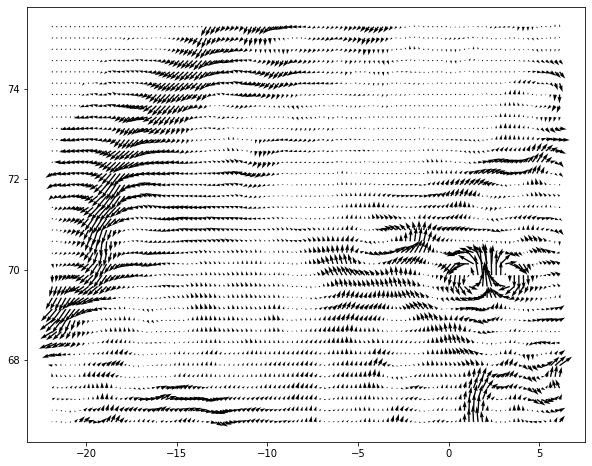

In [102]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.quiver(x, y, ewct, nsct)
plt.show()
plt.close(fig)

In [103]:
few.close()
fns.close()